In [4]:
# Created: 20250103

In [1]:
import pyutil as pyu
pyu.get_local_pyinfo()

'conda env: ml312-2024; pyv: 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:27:36) [GCC 11.2.0]'

In [2]:
print(pyu.ps2("requests"))

requests==2.32.3



[*********************100%***********************]  1 of 1 completed


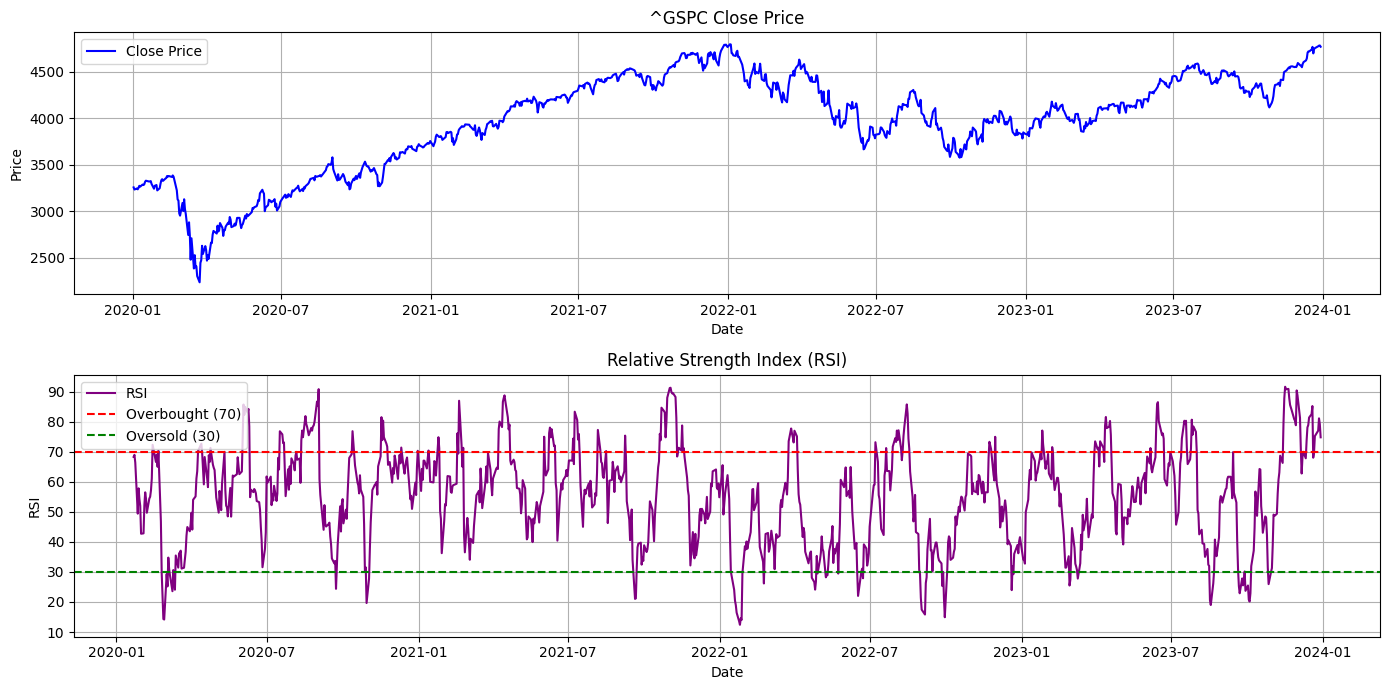

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download historical data
symbol = "^GSPC"  # S&P 500 as an example
start = "2020-01-01"
end = "2023-12-31"
data = yf.download(symbol, start=start, end=end)

# Step 2: Calculate RSI
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)  # Price change between periods
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Average loss
    rs = gain / loss  # Relative Strength
    rsi = 100 - (100 / (1 + rs))  # RSI formula
    data['RSI'] = rsi
    return data

# Apply the RSI calculation
data = calculate_rsi(data)

# Step 3: Plot the RSI
plt.figure(figsize=(14, 7))

# Plot the Close Price
plt.subplot(2, 1, 1)
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title(f'{symbol} Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Plot the RSI
plt.subplot(2, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

In [4]:
def show_graph(symbol):

    # Step 1: Download historical data
    start = "2020-01-01"
    end = "2023-12-31"
    data = yf.download(symbol, start=start, end=end)
    
    # Apply the RSI calculation
    data = calculate_rsi(data)
    
    # Step 3: Plot the RSI
    plt.figure(figsize=(14, 7))
    
    # Plot the Close Price
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.title(f'{symbol} Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    
    # Plot the RSI
    plt.subplot(2, 1, 2)
    plt.plot(data['RSI'], label='RSI', color='purple')
    plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
    plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI')
    plt.legend(loc='best')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

[*********************100%***********************]  1 of 1 completed


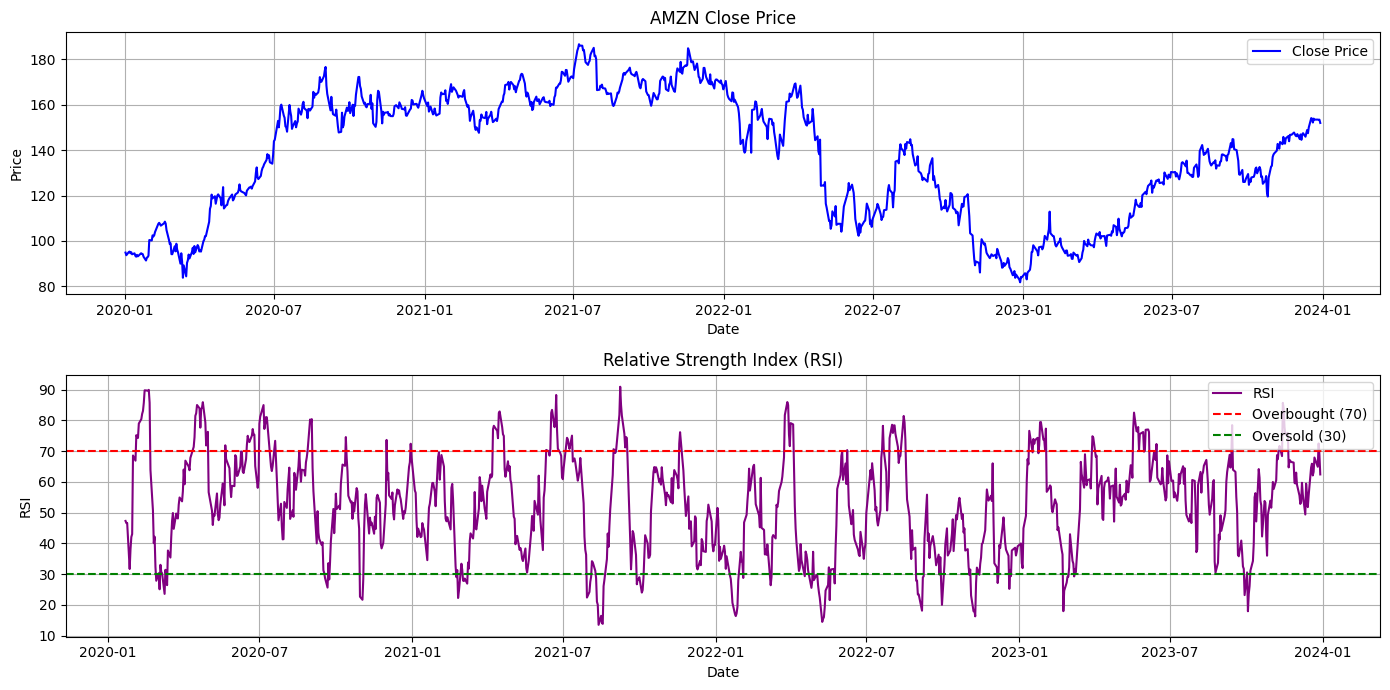

In [5]:
show_graph("AMZN")